In [28]:
import pandas as pd

In [29]:
df=pd.read_csv('Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.drop(['CustomerID','Genre','Age'], axis=1 , inplace=True)

In [33]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [34]:
import seaborn as sns 

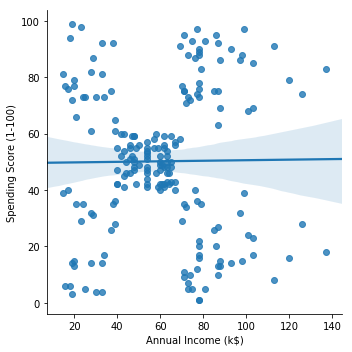

In [35]:
sns.lmplot(x='Annual Income (k$)' , y='Spending Score (1-100)' , data=df)

In [36]:
sns.scatterplot(x='Annual Income (k$)' , y='Spending Score (1-100)' , data=df)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [37]:
from sklearn.cluster import KMeans

In [38]:
km=KMeans(n_clusters=1)

In [39]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
km.inertia_

269981.28

In [41]:
km.cluster_centers_

array([[60.56, 50.2 ]])

In [42]:
km=KMeans(n_clusters=2)
km.fit(df)
km.inertia_

181363.59595959596

In [43]:
km.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

In [50]:
wcss=[]
for i in range(1,41):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
    

In [51]:
import matplotlib as plt

In [52]:
plt.plot(range(1,41))

AttributeError: module 'matplotlib' has no attribute 'plot'

In [53]:
#random Intalization trap
#KMeans ++ plus

In [59]:
km=KMeans(n_clusters=5, init='k-means++') # to have good point
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
cluster =km.predict(df)

In [62]:
df['clusters']=cluster

In [63]:
df.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


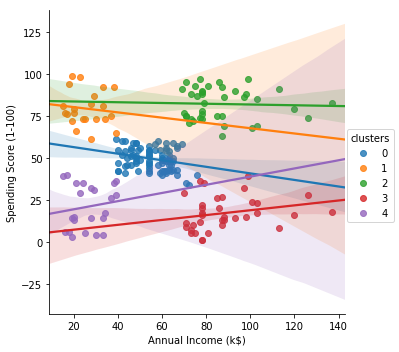

In [66]:
sns.lmplot(x='Annual Income (k$)' , y='Spending Score (1-100)' , hue='clusters', data=df)